<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/CLNcqSzH/finance-and-business-background-bar-chart-and-candlestick-chart-show-stock-market-trading-price-vect.jpg);font-family:newtimeroman;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">1. About Dataset</p>

<a class="btn" href="#home">🏠 Tabel of Contents</a>

<div style="font-family:Georgia;line-height:25px">

<strong>Google's Stock</strong>

Google's stock, or GOOGL, is a popular choice for investors due to the company's strong financial performance and position as a leader in the technology industry. While subject to market volatility, Google's stock is considered a strong long-term investment due to the company's financials and position in the industry.

The Google Stock Price dataset contains historical price information for Google's stock, covering the period from 2016-06-14 to the 2023-05-17. The dataset is made up of seven columns, each providing unique information about Google's stock performance.

The following is the <strong>structure of the data set</strong>:

</div><br>

<div align="center">
<table style="width:100%">
<thead>
<tr>
<th style="text-align:center; font-weight: bold; font-size:20px">Variable Name</th>
<th style="text-align:center; font-weight: bold; font-size:20px">Description</th>
</tr>
</thead>
<tbody>
<tr>
<td><b><center>Open</center></b></td>
<td>displays the opening price of the stock on the given date</td>
</tr>
<tr>
<td><b><center>High</center></b></td>
<td>represents the highest price at which the stock was traded during the day</td>
</tr>
<tr>
<td><b><center>Low</center></b></td>
<td>displays the lowest price at which the stock was traded during the day</td>
</tr>
<tr>
<td><b><center>Close</center></b></td>
<td>represents the closing price of the stock on the given date</td>
</tr>
<tr>
<td><b><center>Volume</center></b></td>
<td>displays the total number of shares traded on the given date</td>
</tr>
<tr>
<td><b><center>Dividends</center></b></td>
<td>Cash payments to shareholders that can reduce the stock price</td>
</tr>
<tr>
<td><b><center>Stock Splits</center></b></td>
<td>Dividing shares to increase affordability and liquidity without changing overall value</td>
</tr>
</tbody>
</table>
</div>
<br><br>

<div style="font-family:Georgia;line-height:25px">

The dataset provides a wealth of information for investors and analysts looking to gain insights into Google's stock performance. By analyzing the data over time, users can identify patterns and trends, evaluate the impact of external factors on stock price, and make informed investment decisions.

The dataset is ideal for conducting advanced data analysis, including regression analysis, time series analysis, and predictive modeling. It can also be used to create informative visualizations, such as line graphs and candlestick charts, to better understand trends and patterns in Google's stock performance.

</div>

In [134]:
# # install some requirement libraries
# !pip install torch-summary
# !pip install yfinance
# !pip install plotly

In [135]:
# import requirement libraries and tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import yfinance as yf
import torch.nn as nn
import torch.functional as F
import plotly.graph_objects as go

from tqdm.notebook import tqdm
from torchsummary import summary
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import TensorDataset, DataLoader

device = torch.device('cuda')
print('using ' + str(device))
torch.set_default_device(device)

using cuda


 <div style="font-family:Georgia;line-height:25px">
to use data from June 14, 2016, to the current date I am setting the <mark>end=None</mark> when calling the history() function. By setting <mark>end=None</mark> , the history() function will automatically retrieve the data up until the current date.

In [136]:
# create a ticker object for Google (GOOGL)
ticker = yf.Ticker("GOOG")

# Define the start and end dates
start_date = "2016-06-14"

# Get historical data for the specified date range
df = ticker.history(start=start_date, end=None)
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-06-14 00:00:00-04:00,35.783282,36.082441,35.615470,35.872681,26122000,0.0,0.0
2016-06-15 00:00:00-04:00,35.909137,36.107908,35.824734,35.905140,24290000,0.0,0.0
2016-06-16 00:00:00-04:00,35.704869,35.791772,35.123031,35.477631,39650000,0.0,0.0
2016-06-17 00:00:00-04:00,35.392222,35.400716,34.383471,34.546684,68048000,0.0,0.0
2016-06-20 00:00:00-04:00,34.898787,35.084077,34.631094,34.646076,41650000,0.0,0.0


<div class="alert danger-alert" style="font-family:Georgia;line-height:25px">
    ⚠ ERROR GOOG: No price data found, symbol may be delisted (1d 2016-06-14 -> 2023-05-17)<br>
    If you encounter such an error, the problem is with your internet and you should check your internet connection and try again
</div><br><br>

<a id="3"></a>
# <p style="background-image: url(https://i.postimg.cc/CLNcqSzH/finance-and-business-background-bar-chart-and-candlestick-chart-show-stock-market-trading-price-vect.jpg);font-family:newtimeroman;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">3. Overview & EDA Dataset</p>

<a class="btn" href="#home">🏠 Tabel of Contents</a>

In [137]:
# # Create a trace for the candlestick chart
# candlestick_trace = go.Candlestick(
#     x=df.index,
#     open=df['Open'],
#     high=df['High'],
#     low=df['Low'],
#     close=df['Close'],
#     name='Candlestick'
# )

# # Create the layout
# layout = go.Layout(
#     title='GOOG Candlestick Chart',
#     xaxis=dict(title='Date'),
#     yaxis=dict(title='Price', rangemode='normal')
# )

# # Create the figure and add the candlestick trace and layout
# fig = go.Figure(data=[candlestick_trace], layout=layout)

# # Update the layout of the figure
# fig.update_layout(xaxis_rangeslider_visible=False)

# # Show the figure
# fig.show()


In [138]:
# Move column 'Close' to the first position
col_close = df.pop('Close')
df.insert(0, 'Close', col_close)
df.head()

,Close,Open,High,Low,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-06-14 00:00:00-04:00,35.872681,35.783282,36.082441,35.615470,26122000,0.0,0.0
2016-06-15 00:00:00-04:00,35.905140,35.909137,36.107908,35.824734,24290000,0.0,0.0
2016-06-16 00:00:00-04:00,35.477631,35.704869,35.791772,35.123031,39650000,0.0,0.0
2016-06-17 00:00:00-04:00,34.546684,35.392222,35.400716,34.383471,68048000,0.0,0.0
2016-06-20 00:00:00-04:00,34.646076,34.898787,35.084077,34.631094,41650000,0.0,0.0


In [139]:
df.tail()

,Close,Open,High,Low,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-08-13 00:00:00-04:00,165.929993,165.184998,166.539993,164.770004,12717600,0.0,0.0
2024-08-14 00:00:00-04:00,162.029999,164.210007,164.960007,159.529999,22515900,0.0,0.0
2024-08-15 00:00:00-04:00,163.169998,162.210007,163.520004,161.490005,18392500,0.0,0.0
2024-08-16 00:00:00-04:00,164.740005,163.410004,166.949997,163.080002,16853100,0.0,0.0
2024-08-19 00:00:00-04:00,168.399994,167.000000,168.470001,166.089996,13076600,0.0,0.0


In [140]:
df.shape

(2059, 7)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2059 entries, 2016-06-14 00:00:00-04:00 to 2024-08-19 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close         2059 non-null   float64
 1   Open          2059 non-null   float64
 2   High          2059 non-null   float64
 3   Low           2059 non-null   float64
 4   Volume        2059 non-null   int64  
 5   Dividends     2059 non-null   float64
 6   Stock Splits  2059 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 128.7 KB


In [142]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Close,2059.0,8.767030e+01,3.965542e+01,3.337502e+01,5.404275e+01,7.421255e+01,1.229950e+02,1.926600e+02
Open,2059.0,8.759970e+01,3.962842e+01,3.351186e+01,5.403551e+01,7.424751e+01,1.225281e+02,1.917500e+02
High,2059.0,8.855522e+01,4.007918e+01,3.357679e+01,5.464194e+01,7.506472e+01,1.242211e+02,1.933100e+02
Low,2059.0,8.674117e+01,3.923204e+01,3.312650e+01,5.341722e+01,7.347638e+01,1.215767e+02,1.906200e+02
Volume,2059.0,2.935968e+07,1.324380e+07,6.936000e+06,2.095100e+07,2.612200e+07,3.349565e+07,1.241400e+08
Dividends,2059.0,9.713453e-05,4.407596e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e-01
Stock Splits,2059.0,9.713453e-03,4.407596e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01


In [143]:
df.isna().sum().to_frame(name='num_of_NaN')

,num_of_NaN
Close,0
Open,0
High,0
Low,0
Volume,0
Dividends,0
Stock Splits,0


<div style="font-family:Georgia;line-height:25px">Thank God 🤲, the data does not have any missing value</div>

In [144]:
df.duplicated().sum()

0

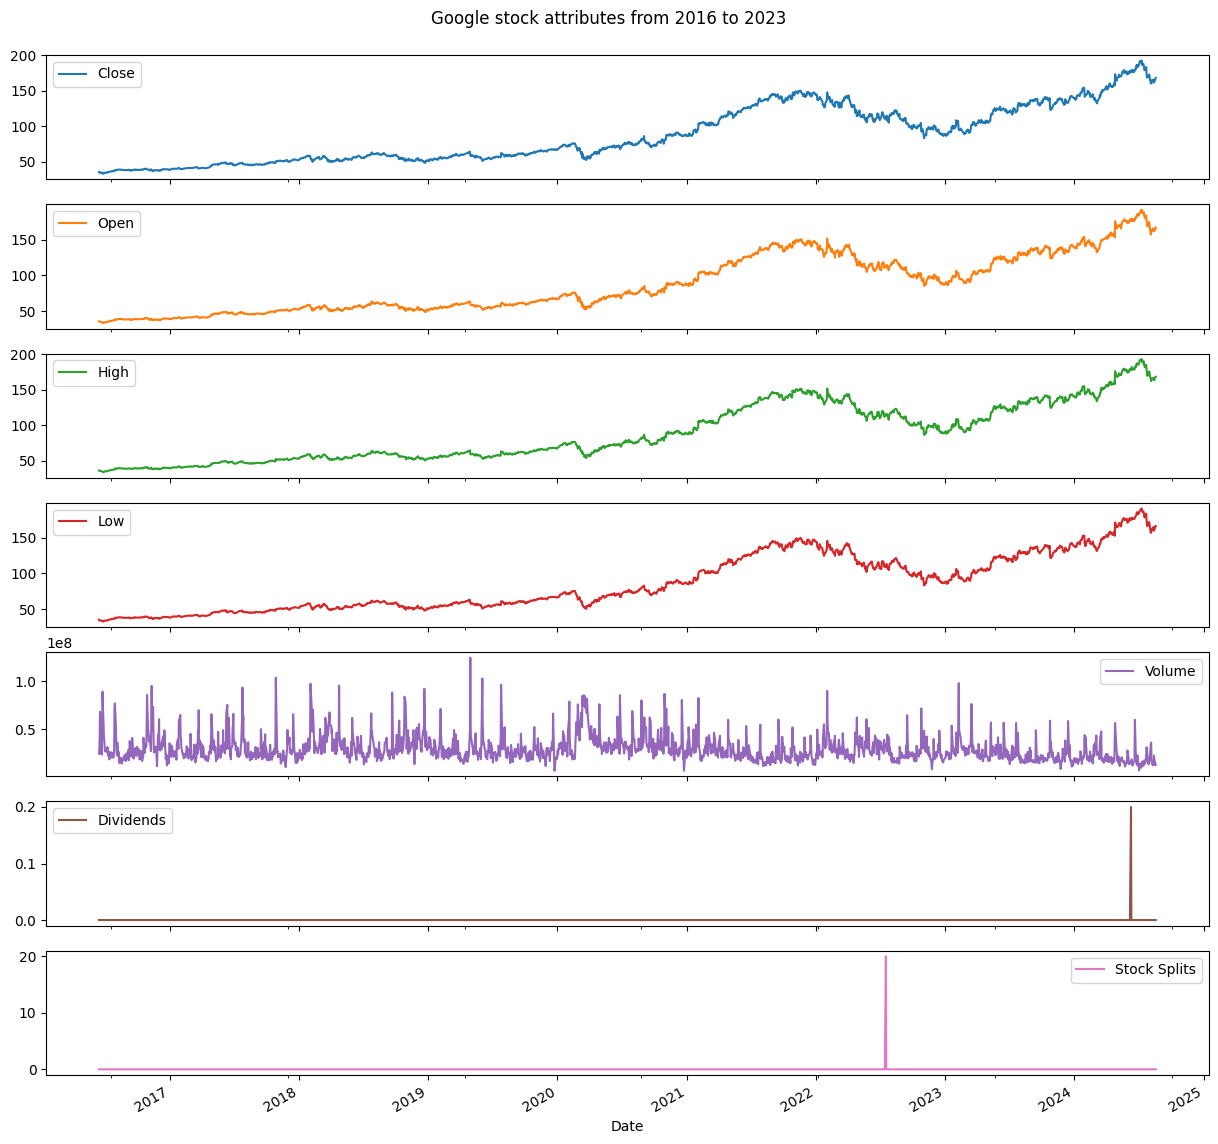

In [145]:
df.plot(subplots=True, figsize=(15, 15))
plt.suptitle('Google stock attributes from 2016 to 2023', y=0.91)
plt.show()

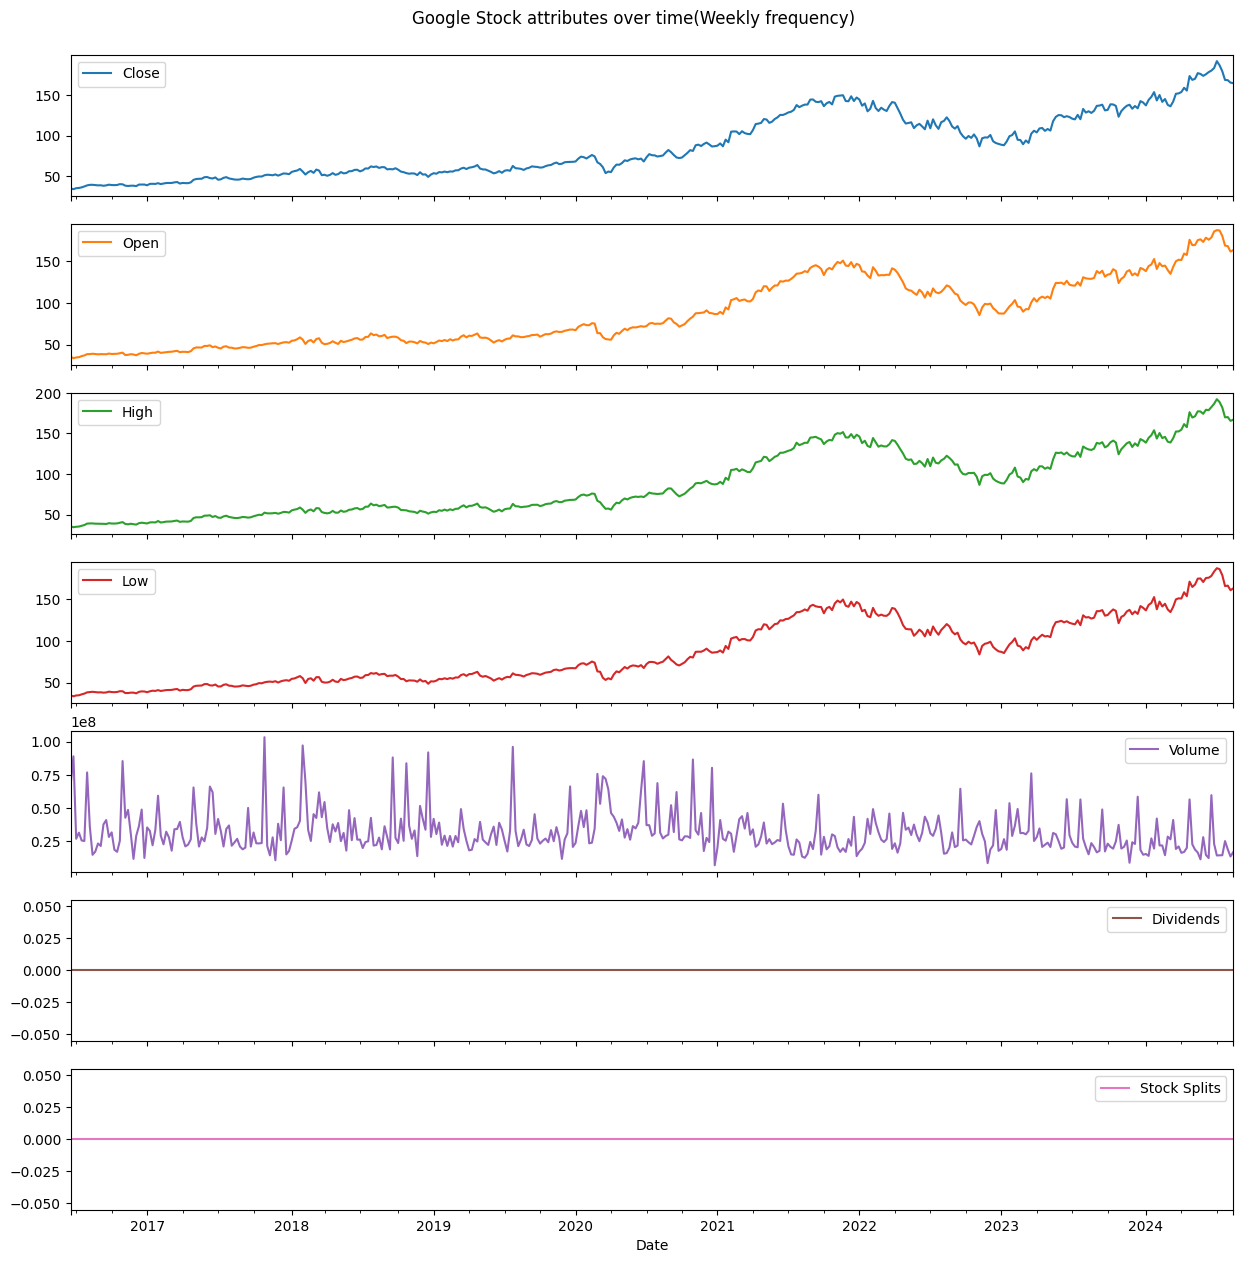

In [146]:
df.asfreq('W', method='ffill').plot(subplots=True, figsize=(15,15), style='-')
plt.suptitle('Google Stock attributes over time(Weekly frequency)', y=0.91)
plt.show()

/tmp/ipykernel_24941/1413366536.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



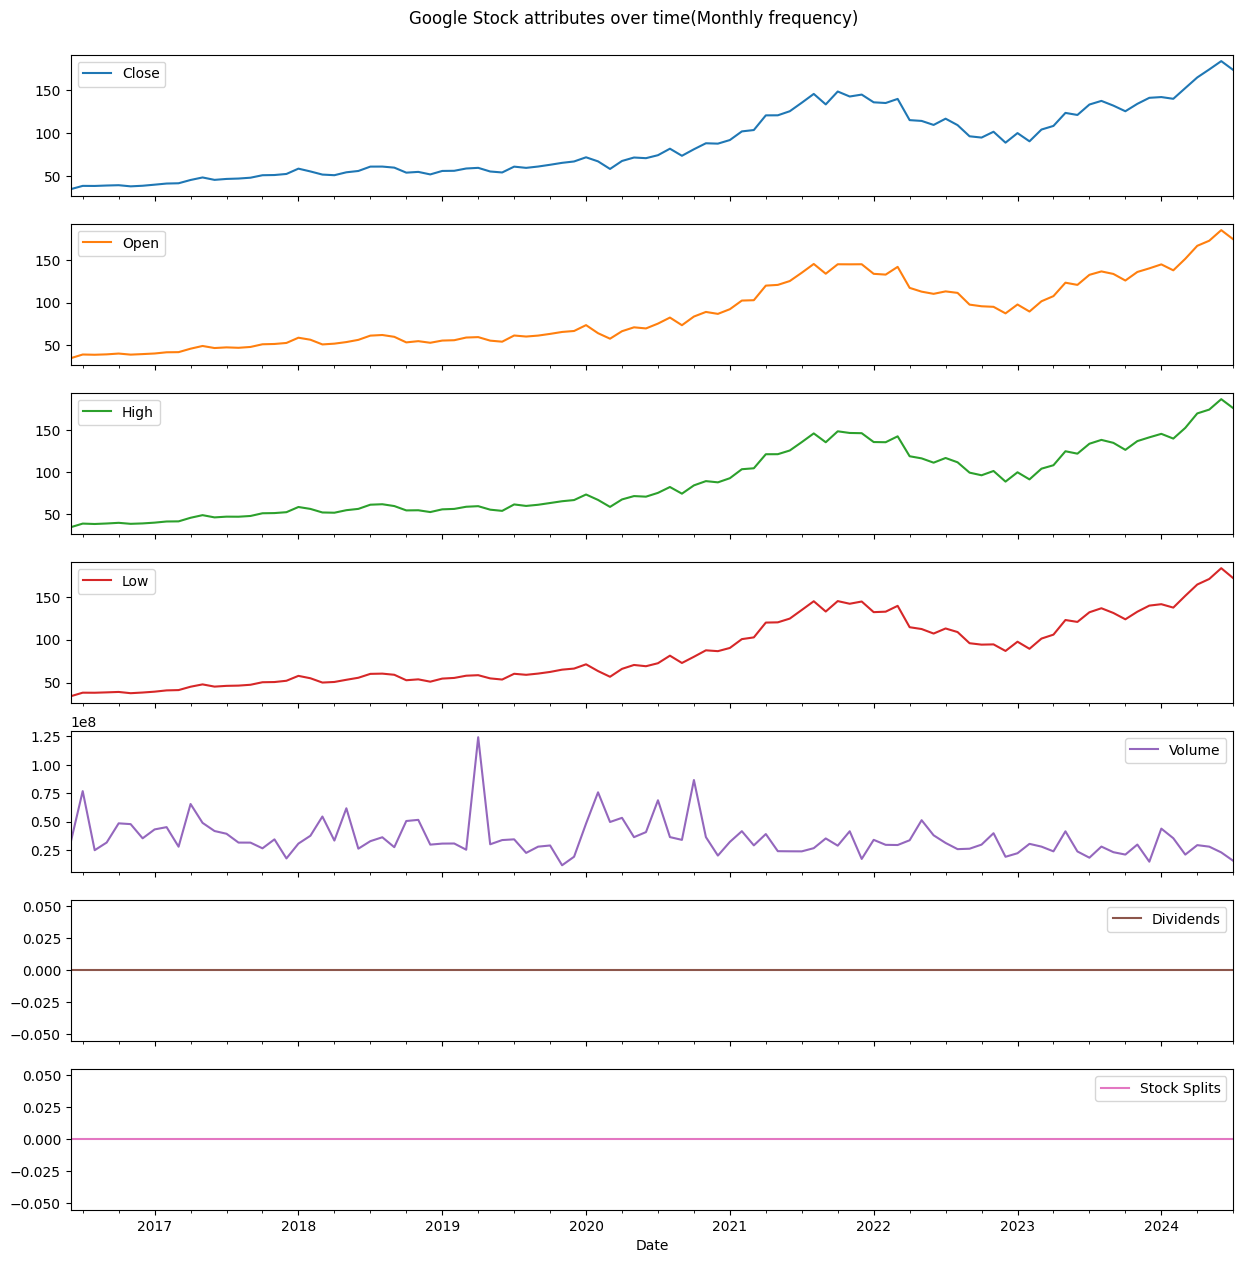

In [147]:
df.asfreq('M', method='ffill').plot(subplots=True, figsize=(15,15), style='-')
plt.suptitle('Google Stock attributes over time(Monthly frequency)', y=0.91)
plt.show()

In [148]:
df[['Close']]

,Close
Date,
2016-06-14 00:00:00-04:00,35.872681
2016-06-15 00:00:00-04:00,35.905140
2016-06-16 00:00:00-04:00,35.477631
2016-06-17 00:00:00-04:00,34.546684
2016-06-20 00:00:00-04:00,34.646076
...,...
2024-08-13 00:00:00-04:00,165.929993
2024-08-14 00:00:00-04:00,162.029999
2024-08-15 00:00:00-04:00,163.169998


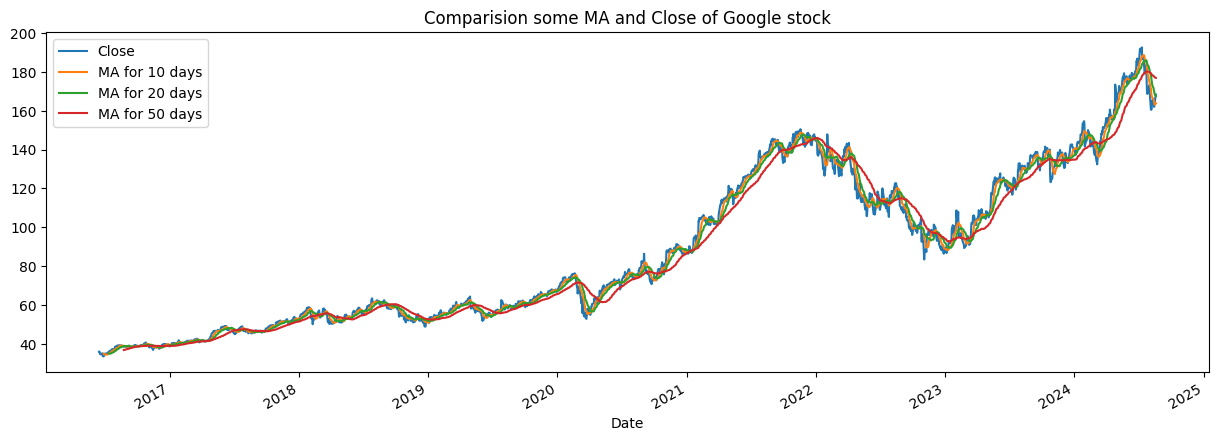

In [149]:
# computing moving average(ma)
ma_day = [10, 20, 50]

for ma in ma_day:
    col_name = f'MA for {ma} days'
    df[col_name] = df['Close'].rolling(ma).mean()

df[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(figsize=(15,5))
plt.title('Comparision some MA and Close of Google stock')
plt.show()

<div style="font-family:Georgia;line-height:25px">
We see in the graph that the best values to measure the moving average are <mark>10 and 20 days</mark> because we still capture trends in the data without noise.</div>

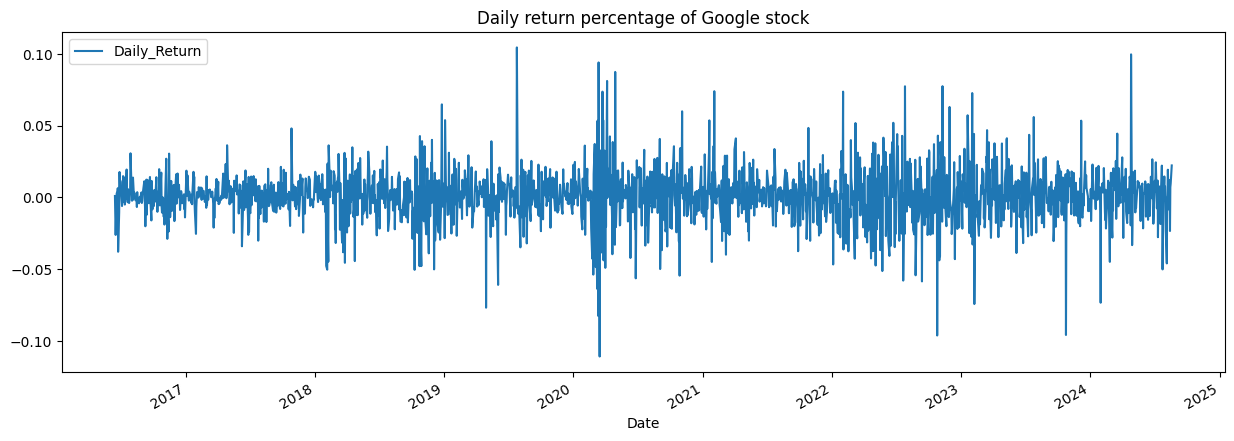

In [150]:
# use pct_change to find the percent change for each day
df['Daily_Return'] = df['Close'].pct_change()
# plot the daily return percentage
df.Daily_Return.plot(legend=True, figsize=(15,5))
plt.title('Daily return percentage of Google stock')
plt.show()

<a id="4"></a>
# <p style="background-image: url(https://i.postimg.cc/CLNcqSzH/finance-and-business-background-bar-chart-and-candlestick-chart-show-stock-market-trading-price-vect.jpg);font-family:newtimeroman;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">4. Preparing Dataset</p>

<a class="btn" href="#home">🏠 Tabel of Contents</a>

<div style="font-family:Georgia;line-height:25px">
<strong>Data Normalization</strong>

This is an important pre-processing step for neural networks:
</div>

In [151]:
# normalize data
df2 = df.copy(deep=True)
scaler = MinMaxScaler(feature_range=(0,15)).fit(df2.Low.values.reshape(-1,1))
df2['Open'] = scaler.transform(df2.Open.values.reshape(-1,1))
df2['High'] = scaler.transform(df2.High.values.reshape(-1,1))
df2['Low'] = scaler.transform(df2.Low.values.reshape(-1,1))
df2['Close'] = scaler.transform(df2.Close.values.reshape(-1,1))
data = df2[['Open','High','Low', 'Close']].values
data.shape

(2059, 4)

In [152]:
data

array([[ 0.25303698,  0.2815295 ,  0.23705421,  0.26155149],
       [ 0.26502366,  0.28395505,  0.25698492,  0.26464298],
       [ 0.24556878,  0.25384559,  0.19015331,  0.22392612],
       ...,
       [12.29417501, 12.41894183, 12.22560063, 12.38560654],
       [12.40846515, 12.7456213 , 12.37703511, 12.53513723],
       [12.75038369, 12.8903896 , 12.6637131 , 12.88372196]])

<div style="font-family:Georgia;line-height:25px">
<strong>Preparing Data for Time Series</strong>

In order to prepare the dataset for stock price prediction, we need to frame it as a time series problem. We will use the price from the previous 10 days to predict the price on the next day. Let’s 
create the sequences accordingly:
</div>

In [153]:
seq_len=11
sequences=[]
for index in range(len(data) - seq_len + 1): 
    sequences.append(data[index: index + seq_len])
sequences= np.array(sequences)

<div style="font-family:Georgia;line-height:25px">
<strong>Splitting the Data</strong>

We divide the entire dataset into three parts. 80% for the training set, 10% for the validation set and the remaining 10% for the test set:
</div>

In [154]:
valid_set_size_percentage = 10 
test_set_size_percentage = 10 

valid_set_size = int(np.round(valid_set_size_percentage/100*sequences.shape[0]))  
test_set_size  = int(np.round(test_set_size_percentage/100*sequences.shape[0]))
train_set_size = sequences.shape[0] - (valid_set_size + test_set_size)

x_train = sequences[:train_set_size,:-1,:]
y_train = sequences[:train_set_size,-1,:]
    
x_valid = sequences[train_set_size:train_set_size+valid_set_size,:-1,:]
y_valid = sequences[train_set_size:train_set_size+valid_set_size,-1,:]
    
x_test = sequences[train_set_size+valid_set_size:,:-1,:]
y_test = sequences[train_set_size+valid_set_size:,-1,:]

<a id="5"></a>
# <p style="background-image: url(https://i.postimg.cc/CLNcqSzH/finance-and-business-background-bar-chart-and-candlestick-chart-show-stock-market-trading-price-vect.jpg);font-family:newtimeroman;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">5. Build, Train & Test Models</p>

<a class="btn" href="#home">🏠 Tabel of Contents</a>

<a id="5_1"></a>
# <p style="background-image: url(https://i.postimg.cc/CLNcqSzH/finance-and-business-background-bar-chart-and-candlestick-chart-show-stock-market-trading-price-vect.jpg);font-family:newtimeroman;font-size:100%;color:white;text-align:center;border-radius:15px 50px; padding:7px">5.1. Model 1 (Vanilla LSTM)</p>

<a class="btn" href="#home">🏠 Tabel of Contents</a>

<div style="font-family:Georgia;line-height:25px">
<strong>Creating Data Loaders</strong>

Next, we define the data loaders to load the dataset in batches:
</div>


In [155]:
x_train = torch.tensor(x_train).float()
y_train = torch.tensor(y_train).float()

x_valid = torch.tensor(x_valid).float()
y_valid = torch.tensor(y_valid).float()

train_dataset = TensorDataset(x_train,y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=False)

valid_dataset = TensorDataset(x_valid,y_valid)
valid_dataloader = DataLoader(valid_dataset, batch_size=32, shuffle=False)

<div style="font-family:Georgia;line-height:25px">
<strong>Defining Model Architecture</strong>

We will define the model architecture. As it’s a time series problem, we will use Long Short-term Memory (LSTM) to capture the sequential information:
</div>


In [200]:
from torch import nn
class NeuralNetwork(nn.Module):
    def __init__(self, num_feature, hidden_size):
        super(NeuralNetwork, self).__init__()
        self.lstm  = nn.LSTM(num_feature, hidden_size, batch_first=True)
        self.fc    = nn.Linear(hidden_size, num_feature)
        
    def forward(self, x):
        output, (hidden, cell) = self.lstm(x)
        x = self.fc(hidden)
        return x

hidden_size = 256
model = NeuralNetwork(4, hidden_size)
optimizer = optim.Adam(model.parameters())
mse = nn.MSELoss()
#push to cuda if available
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  
# model = model.to(device)

In [201]:
# print summary of model like summary in tensorflow
# summary(model, (6, ))

<div style="font-family:Georgia;line-height:25px">
<strong>Model Training</strong>

First, we define the forward and backward pass for training the neural network:
</div>


In [202]:
def train(dataloader):
    epoch_loss = 0
    model.train()  
    
    for batch in dataloader:
        optimizer.zero_grad()          
        x,y= batch
        pred = model(x)
        loss = mse(pred[0],y)        
        loss.backward()               
        optimizer.step()      
        epoch_loss += loss.item()  
        
    return epoch_loss / len(dataloader)

<div style="font-family:Georgia;line-height:25px">
Now, let us define only the forward pass for evaluating the model performance:
</div>


In [203]:
def evaluate(dataloader):
    epoch_loss = 0
    model.eval()  
    
    with torch.no_grad():
      for batch in dataloader:   
          x,y= batch
          pred = model(x)
          loss = mse(pred[0],y)              
          epoch_loss += loss.item()  
        
    return epoch_loss / len(dataloader)

<div style="font-family:Georgia;line-height:25px">
Let’s train the model for 50 epochs. We will also save the best model during training based on the validation loss.
</div>



In [204]:
n_epochs = 50
best_valid_loss = float('inf')
# def init_weights(m):
#     if isinstance(m, nn.Linear):
#         nn.init.kaiming_uniform_(m.weight, mode='fan_in', nonlinearity='relu')
#         m.bias.data.fill_(0.01)
# model.apply(init_weights)

for epoch in range(1, n_epochs + 1):

    train_loss = train(train_dataloader)
    valid_loss = evaluate(valid_dataloader)
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model, 'saved_weights.pt')

    print("Epoch ",epoch+1)
    print(f'\tTrain Loss: {train_loss:.5f} | ' + f'\tVal Loss: {valid_loss:.5f}\n')

Epoch  2
	Train Loss: 2.52358 | 	Val Loss: 4.25438

Epoch  3
	Train Loss: 15.48191 | 	Val Loss: 3.18273

Epoch  4
	Train Loss: 6.69572 | 	Val Loss: 1.85551

Epoch  5
	Train Loss: 1.25748 | 	Val Loss: 1.01240

Epoch  6
	Train Loss: 1.17838 | 	Val Loss: 0.60881

Epoch  7
	Train Loss: 1.43120 | 	Val Loss: 2.00378

Epoch  8
	Train Loss: 2.06401 | 	Val Loss: 29.55178

Epoch  9
	Train Loss: 1.63202 | 	Val Loss: 3.14617

Epoch  10
	Train Loss: 0.83900 | 	Val Loss: 13.54881

Epoch  11
	Train Loss: 0.62508 | 	Val Loss: 4.80136

Epoch  12
	Train Loss: 2.01264 | 	Val Loss: 2.74579



Epoch  13
	Train Loss: 1.62955 | 	Val Loss: 2.36398

Epoch  14
	Train Loss: 1.49932 | 	Val Loss: 2.07970

Epoch  15
	Train Loss: 1.58459 | 	Val Loss: 2.40082

Epoch  16
	Train Loss: 1.12936 | 	Val Loss: 1.27323

Epoch  17
	Train Loss: 0.84496 | 	Val Loss: 1.26073

Epoch  18
	Train Loss: 0.75529 | 	Val Loss: 1.00007

Epoch  19
	Train Loss: 0.58385 | 	Val Loss: 0.70845

Epoch  20
	Train Loss: 0.64465 | 	Val Loss: 0.90750

Epoch  21
	Train Loss: 0.64399 | 	Val Loss: 1.01166

Epoch  22
	Train Loss: 0.30513 | 	Val Loss: 0.34141

Epoch  23
	Train Loss: 0.21705 | 	Val Loss: 0.20196

Epoch  24
	Train Loss: 0.22700 | 	Val Loss: 0.20886

Epoch  25
	Train Loss: 0.27547 | 	Val Loss: 0.28231

Epoch  26
	Train Loss: 0.24543 | 	Val Loss: 0.24548

Epoch  27
	Train Loss: 0.19824 | 	Val Loss: 0.19907

Epoch  28
	Train Loss: 0.14120 | 	Val Loss: 0.11912

Epoch  29
	Train Loss: 0.12304 | 	Val Loss: 0.10025

Epoch  30
	Train Loss: 0.10823 | 	Val Loss: 0.08197

Epoch  31
	Train Loss: 0.10436 | 	Val Loss: 0.

<div style="font-family:Georgia;line-height:25px">
<strong>Model Inference</strong>
We are ready to make some predictions. First, we load the best model:
</div>


In [205]:
model=torch.load('saved_weights.pt')

Let’s make predictions on the test set:

In [206]:
x_test= torch.tensor(x_test).float()

with torch.no_grad():
  y_test_pred = model(x_test)

y_test_pred = y_test_pred.cpu().numpy()[0]

/home/ubuntu/miniconda3/envs/sim/lib/python3.10/site-packages/torch/utils/_device.py:77: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



<div style="font-family:Georgia;line-height:25px">
Finally, we visualize the predictions and compare them with the ground truth:
</div>

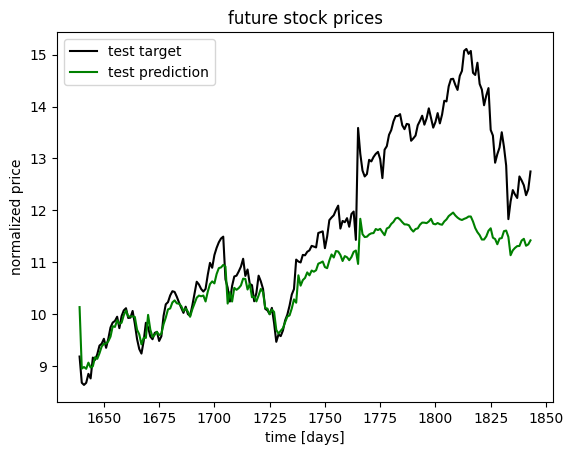

In [207]:
idx=0
plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,idx], color='black', label='test target')

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,idx], color='green', label='test prediction')

plt.title('future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best')

In [208]:
index_values = df[len(df) - len(y_test):].index
col_values = ['Open', 'Low', 'High', 'Close']
df_results = pd.DataFrame(data=y_test_pred, index=index_values, columns=col_values)

In [209]:
# # Create a trace for the candlestick chart
# candlestick_trace = go.Candlestick(
#     x=df_results.index,
#     open=df_results['Open'],
#     high=df_results['High'],
#     low=df_results['Low'],
#     close=df_results['Close'],
#     name='Candlestick'
# )

# # Create the layout
# layout = go.Layout(
#     title='GOOG Candlestick Chart',
#     xaxis=dict(title='Date'),
#     yaxis=dict(title='Price', rangemode='normal')
# )

# # Create the figure and add the candlestick trace and layout
# fig = go.Figure(data=[candlestick_trace], layout=layout)

# # Update the layout of the figure
# fig.update_layout(xaxis_rangeslider_visible=False)

# # Show the figure
# fig.show()


<a id="8"></a>
# <p style="background-image: url(https://i.postimg.cc/CLNcqSzH/finance-and-business-background-bar-chart-and-candlestick-chart-show-stock-market-trading-price-vect.jpg);font-family:newtimeroman;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">8. Predict Next 10 Days</p>

<a class="btn" href="#home">🏠 Tabel of Contents</a>

In [210]:
# Get the last sequence of historical data as features for predicting the next 10 days
last_sequence = sequences[-1:, 1:, :]
last_sequence = torch.from_numpy(last_sequence).float().to(device)

# Generate predictions for the next 10 days
PRED_DAYS = 10
with torch.no_grad():
    for i in range(PRED_DAYS):
        pred_i = model(last_sequence)
        last_sequence = torch.cat((last_sequence, pred_i), dim=1)
        last_sequence = last_sequence[:, 1:, :]


pred_days = last_sequence.reshape(PRED_DAYS, 4).cpu().numpy()

# inverse transform the predicted values
pred_days = scaler.inverse_transform(pred_days)

df_pred = pd.DataFrame(
    data=pred_days,
    columns=['Open', 'High', 'Low', 'Close']
)

df_pred

,Open,High,Low,Close
0,154.233795,155.551315,152.711578,154.877579
1,146.658051,147.696884,144.834259,147.042175
2,143.282547,144.454315,141.549255,143.893661
3,142.039917,143.339432,140.434814,142.803497
4,141.411011,142.724701,139.817581,142.172974
5,140.752960,142.055176,139.101364,141.489502
6,140.192200,141.496811,138.516953,140.857559
7,139.790649,141.135086,138.159912,140.349747
8,139.462296,140.837387,137.858078,139.902496
9,139.158844,140.546417,137.553406,139.482712
